## Andrew Ingrassia
## Exercise 4.7
***

### Imports

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
# Uses the 'os.path.join()' function to simplify the process of locating the desired file path
path = r"C:\Users\ingra\OneDrive\Desktop\Career Foundry\(2) Data Analytics Immersion\Data Immersion - Section 4\Instacart Basket Analysis"

In [3]:
# Imports the 'order_products_merged' dataframe
ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.pkl'))

### Creating a subset of the 'ords_prods_merged' dataframe

In [4]:
# Limits the 'ords_prods_merged' df to the first million rows only
df = ords_prods_merged[:1000000]

### Assigning labels to price ranges

In [5]:
# Defines a function for filtering the df
def price_label(row):

  if row['prices'] <= 5:
    return 'Low-range product'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid-range product'
  elif row['prices'] > 15:
    return 'High range'
  else: return 'Not enough data'

In [34]:
# Creates a new column within the 'df' dataframe called 'price_range' and designates it as the location for labels
df['price_range'] = df.apply(price_label, axis=1)

# Uses .loc to set the values directly in the DataFrame
df.loc[:, 'price_range'] = df['price_range']

In [35]:
# Checks values in the new 'price_range' column
# Notice that there are no 'High range' products
df['price_range'].value_counts()

Mid-range product    756450
Low-range product    243550
Name: price_range, dtype: int64

In [36]:
# Determines the highest value in the 'prices' column
df['prices'].max()

14.8

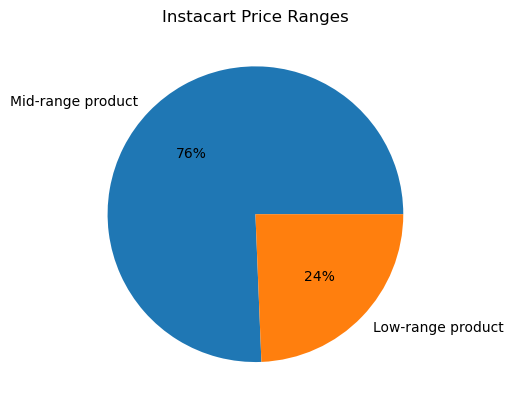

In [37]:
# Creates a pie chart representing the various price ranges

price_range_pie = df['price_range'].value_counts().plot.pie(title = 'Instacart Price Ranges', label = '', autopct=('%1.f%%'))

### Using the loc() function

In [38]:
ords_prods_merged.loc[ords_prods_merged['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [39]:
ords_prods_merged.loc[(ords_prods_merged['prices'] <= 15) & (ords_prods_merged['prices'] > 5), 'price_range_loc'] = 'Mid-range product' 

In [40]:
 ords_prods_merged.loc[ords_prods_merged['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [41]:
ords_prods_merged['price_range_loc'].value_counts(dropna = False)

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

### If-statements with for-loops

In [42]:
# Determines the day that most orders take place (0 = Saturday)
ords_prods_merged['orders_day_of_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [43]:
result = []                                             # Creates an empty list

for value in ords_prods_merged["orders_day_of_week"]:   # For each value in the 'orders_day_of_week' column...
  if value == 0:                                        # If the value = '0' (Saturday)...
    result.append("Busiest day")                        # Append 'Busiest Day' to the 'result' list
  elif value == 4:                                      # If the value = '4' (Wednesday)...
    result.append("Least busy")                         # Append 'Least busy' to the 'result' list...
  else:                                                 # Otherwise...
    result.append("Regularly busy")                     # Append 'Regularly busy' to the 'result' list

In [44]:
# Views the 'result' list
result

['Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Least busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Regularly busy',
 'Least busy',
 'Regularly busy',
 'Busiest day',
 'Regularly busy',
 'Reg

In [45]:
# Adds the 'busiest_day' column to the 'ords_prods_merged' df
# Populates the 'busiest_day' column with the contents of 'result'
ords_prods_merged['busiest_day'] = result

In [46]:
# Checks the frequency of values in the 'busiest_day' column
ords_prods_merged['busiest_day'].value_counts(dropna = False)

Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: busiest_day, dtype: int64

## Task 4.7
***

#### 1. Suppose your clients have changed their minds about the labels you created in your “busiest_day” column. Now, they want “Busiest day” to become “Busiest days” (plural). This label should correspond with the two busiest days of the week as opposed to the single busiest day. At the same time, they’d also like to know the two slowest days. Create a new column for this using a suitable method.

In [47]:
# Drops the 'busiest_day' column from the 'ords_prods_merged' df
ords_prods_merged = ords_prods_merged.drop('busiest_day', axis=1)

In [48]:
# Checks that the 'busiest_day' column is gone
ords_prods_merged.head(1)

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_days,busiest_period_of_day
0,0,2539329,1,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Mid-range product,Moderately busy,Average orders


In [49]:
result_2 = []                                           # Creates an empty list for busiest and 

for value in ords_prods_merged["orders_day_of_week"]:   # For each value in the 'orders_day_of_week' column...
  if value == 0 or value == 1:                          # If the value = '0' (Saturday) or '1' (Sunday)...
    result_2.append("Most busy")                        # Append 'Busiest Day' to the 'result' list
  elif value == 4 or value == 3:                        # If the value = '4' (Wednesday) or '3' (Tuesday)...
    result_2.append("Least busy")                       # Append 'Least busy' to the 'result' list...
  else:                                                 # Otherwise...
    result_2.append("Moderately busy")                  # Append 'Moderately busy' to the 'result' list

In [50]:
# Creates the 'busiest_days' (plural) column and populates it with the contents of the 'result_2' list
ords_prods_merged['busiest_days'] = result_2

#### 2. Check the values of this new column for accuracy. Note any observations in markdown format.

In [51]:
# Checks the new column for accuracy
ords_prods_merged['busiest_days'].value_counts(dropna = False)

Moderately busy    12916111
Most busy          11864412
Least busy          7624336
Name: busiest_days, dtype: int64

- The most busy days (Saturday and Sunday) and the least busy days (Tuesday and Wednesday) have been aggregated together

#### 3. When too many users make Instacart orders at the same time, the app freezes. The senior technical officer at Instacart wants you to identify the busiest hours of the day. Rather than by hour, they want periods of time labeled "Most orders", "Average orders", and "Fewest orders". Create a new column containing these labels called "busiest_period_of_day".

In [52]:
# Checks the business of each hour of the day
ords_prods_merged['order_hour_of_day'].value_counts(dropna = False)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: order_hour_of_day, dtype: int64

In [53]:
result_3 = []                                           # Creates an empty list

for x in ords_prods_merged['order_hour_of_day']:        # For each value in the 'order_hour_of_day' column...
    if x in [10, 11, 14, 15, 13, 12, 16, 9]:            # If the value is within the indicated list...
        result_3.append('Most orders')                  # Append 'Most orders' to result_3...
    elif x in [17, 8, 18, 19, 20, 7, 21, 22]:           # If the value is within the indicated list...
        result_3.append('Average orders')               # Append 'Average orders' to result_3...
    else:                                               # Otherwise...
        result_3.append('Fewest orders')                # Append 'Fewest orders' to result_3

In [54]:
# Views the 'result_3' list
result_3

['Average orders',
 'Average orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Most orders',
 'Average orders',
 'Most orders',
 'Most orders',
 'Most ord

In [55]:
# Appends the 'result_3' list to 'ords_prods_merged'
ords_prods_merged['busiest_period_of_day'] = result_3

In [56]:
# Views the new column within the 'ords_prods_merged' df
ords_prods_merged.head(5)

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_days,busiest_period_of_day
0,0,2539329,1,1,2,8,NaN,196,1,0,195,Soda,77,7,9.0,both,Mid-range product,Moderately busy,Average orders
1,1,2398795,1,2,3,7,15.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders
2,2,473747,1,3,3,12,21.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders
3,3,2254736,1,4,4,7,29.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Average orders
4,4,431534,1,5,4,15,28.0,196,1,1,195,Soda,77,7,9.0,both,Mid-range product,Least busy,Most orders


#### 4. Print the frequency for this new column

In [57]:
# Checks the value frequency within the 'busiest_period_of_day' column
ords_prods_merged['busiest_period_of_day'].value_counts(dropna = False)

Most orders       21118071
Average orders     9997651
Fewest orders      1289137
Name: busiest_period_of_day, dtype: int64

#### 5. Export the dataframe as a pickle and store it correctly in the "Prepared Data" folder.

In [58]:
# Exports the 'ords_prods_merged' dataframe in pickle format
ords_prods_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'ords_prods_merged.pkl'))

In [59]:
ords_prods_merged.shape

(32404859, 19)